# Connect to your google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change your system path
import os
os.chdir('./drive/MyDrive/emb')

In [3]:
os.getcwd()

'/content/drive/MyDrive/emb'

# Read data from your google drive

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/WISDM_ar_v1.1_trans_about.txt
./dataset/WISDM_ar_v1.1_raw.txt
./dataset/WISDM_ar_v1.1_raw_about.txt
./dataset/WISDM_ar_v1.1_transformed.arff
./dataset/readme.txt
./dataset/our_dataset_0527.txt
./dataset/our_dataset.txt


In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


#Data Cleaning & Preprocessing
drop null values.

change datatype of the ‘z-axis’ column to float.

drop the rows where the timestamp = 0.

sort data in ascending order of ‘user’ and ‘timestamp’ columns.

In [6]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
# df_har = pd.read_csv('./dataset/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df_har = pd.read_csv('./dataset/our_dataset.txt', header = None, names = columns)
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,0,-0.144,-0.945,+0.271;
1,37,Downstairs,125000000,-0.132,-0.907,+0.363;
2,37,Downstairs,250000000,-0.104,-0.924,+0.358;
3,37,Downstairs,375000000,-0.021,-0.927,+0.406;
4,37,Downstairs,500000000,-0.130,-0.873,+0.322;
...,...,...,...,...,...,...
29130,42,Standing,3641250000000,-0.018,-1.027,-0.089;
29131,42,Standing,3641375000000,-0.023,-1.021,-0.089;
29132,42,Standing,3641500000000,-0.024,-1.022,-0.089;
29133,42,Standing,3641625000000,-0.023,-1.028,-0.089;


In [7]:
# removing null values
df_har = df_har.dropna()
print(df_har.shape)
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)
df

(29135, 6)


,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,125000000,-0.132,-0.907,0.363
1,37,Downstairs,250000000,-0.104,-0.924,0.358
2,37,Downstairs,375000000,-0.021,-0.927,0.406
3,37,Downstairs,500000000,-0.130,-0.873,0.322
4,37,Downstairs,625000000,-0.252,-1.126,0.065
...,...,...,...,...,...,...
29129,42,Standing,3641250000000,-0.018,-1.027,-0.089
29130,42,Standing,3641375000000,-0.023,-1.021,-0.089
29131,42,Standing,3641500000000,-0.024,-1.022,-0.089
29132,42,Standing,3641625000000,-0.023,-1.028,-0.089


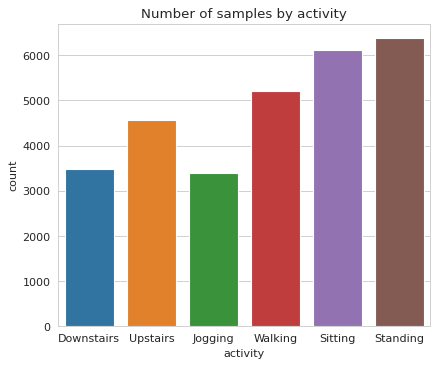

Standing      6382
Sitting       6109
Walking       5208
Upstairs      4561
Downstairs    3484
Jogging       3390
Name: activity, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()
df['activity'].value_counts()

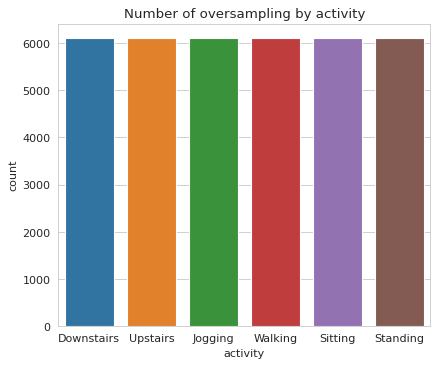

Downstairs    6109
Upstairs      6109
Jogging       6109
Walking       6109
Sitting       6109
Standing      6109
Name: activity, dtype: int64

In [28]:
# only block controlling oversampling
from imblearn.over_sampling import SMOTE, SMOTENC

X = df.drop(['activity'], axis=1)
y = df['activity']
col_names = pd.concat([X, y], axis=1).columns.tolist()
smt = SMOTE(random_state=42)
X_smote, y_smote = smt.fit_resample(X, y)
X_smote.insert(loc=1, column='activity', value=y_smote)
df = X_smote

figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = df)
plt.title('Number of oversampling by activity')
plt.show()
df['activity'].value_counts()

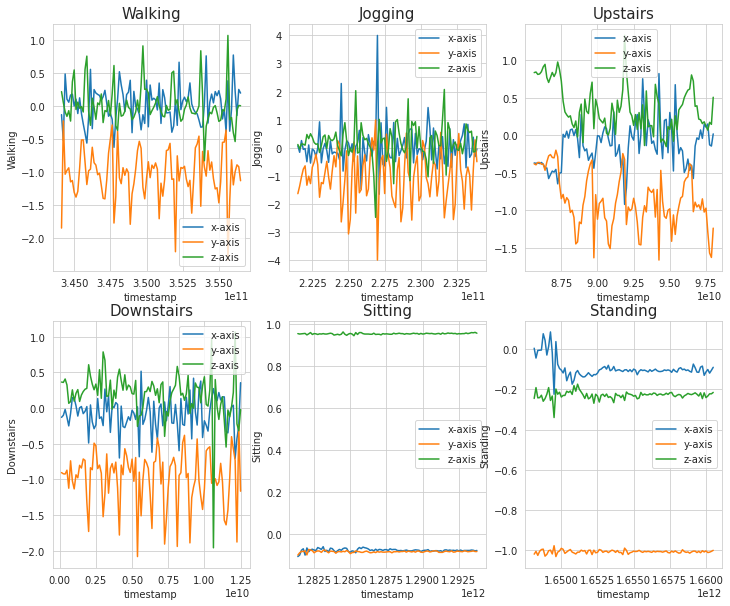

In [32]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df[(df['user']==37)&(df['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
  #plt.savefig(i+'.png')
  
  #plt.show()
plt.show()

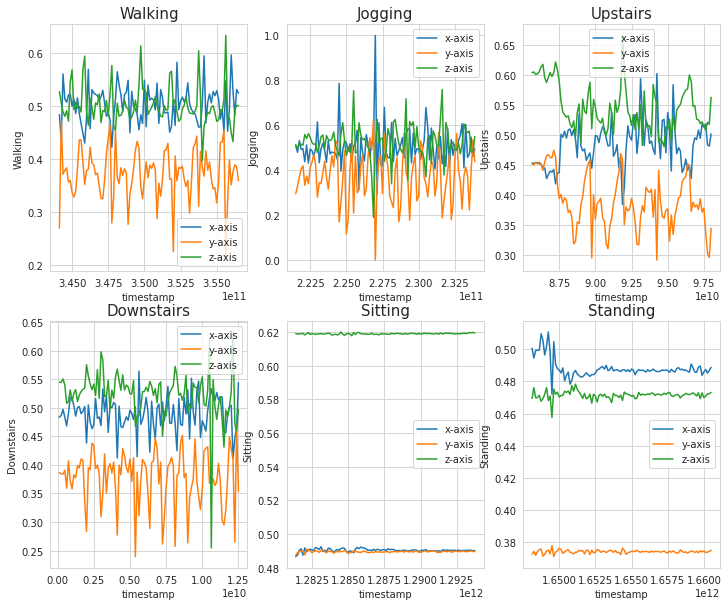

In [9]:
# copy the data
df_max_scaled = df.copy()
# apply normalization techniques
for ind in df_max_scaled.columns:
  if ind == 'x-axis' or ind == 'y-axis' or ind == 'z-axis':
    # df_max_scaled[ind] = (df_max_scaled[ind] + 20) / 40
    df_max_scaled[ind] = (df_max_scaled[ind] + 4) / 8
# indicate 
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df_max_scaled[(df_max_scaled['user']==37)&(df_max_scaled['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
#plt.savefig(i+'.png')
  #plt.show()
plt.show()

In [10]:
random_seed = 42   
n_time_steps = 50
n_features = 3 
step = 10         
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [11]:
segments = []
labels = []
#數據會有些重疊
window_len = 50
check = []
from scipy import stats
import numpy as np
flag = False
for i in range(0,  df_max_scaled.shape[0]- window_len, 10):  
        
    if df_max_scaled['activity'][i] == df_max_scaled['activity'][i+window_len]:
        flag = True
        for j in range(0,window_len):

            xs = df_max_scaled['x-axis'].values[i+j]  

            ys = df_max_scaled['y-axis'].values[i+j]

            zs = df_max_scaled['z-axis'].values[i+j]

            segments.append([xs, ys, zs])
    else:
        flag = False
    if flag == True:
        label = stats.mode(df_max_scaled['activity'][i: i + window_len])[0][0]

        #segments.append([xs, ys, zs])
        check.append(label)
        labels.append(label)
print( np.asarray(segments, dtype= np.float32).shape)
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, window_len, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

(140950, 3)


In [12]:
class_label =['Downstairs','Jogging',"Sitting","Standing",'Upstairs','Walking']
for act in class_label:
    for index,i in enumerate(check):
        if i == act:
          print (labels[index],check[index])
          break

[1. 0. 0. 0. 0. 0.] Downstairs
[0. 1. 0. 0. 0. 0.] Jogging
[0. 0. 1. 0. 0. 0.] Sitting
[0. 0. 0. 1. 0. 0.] Standing
[0. 0. 0. 0. 1. 0.] Upstairs
[0. 0. 0. 0. 0. 1.] Walking


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = 42)

In [14]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2255, 50, 3, 1), (564, 50, 3, 1), (2255, 6), (564, 6))

# Train model in Python

In [16]:
# model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D,Reshape,Conv1D,MaxPooling1D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import keras

In [17]:
import tensorflow as tf

class HalNet(tf.keras.Model):
    def __init__(self):
        super(HalNet, self).__init__()
        self.model = Sequential()
        self.model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
        self.model.add(Dropout(0.1))

        self.model.add(Conv2D(32, (2, 2), activation='relu'))
        self.model.add(Dropout(0.2))

        self.model.add(Flatten())

        self.model.add(Dense(64, activation = 'relu'))
        self.model.add(Dropout(0.5))

        self.model.add(Dense(6, activation='softmax'))

        self.model.summary()

    def call(self, inputs):

        out = self.model(inputs)
        
        return out

In [18]:
model = HalNet()
model.build((None,50,3,1))
model.compile(optimizer="Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 2, 16)         80        
                                                                 
 dropout (Dropout)           (None, 49, 2, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 1, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 48, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [22]:
model.load_weights("/content/drive/MyDrive/emb/model_0530.h5")

In [32]:
history = model.fit(X_train, y_train,batch_size=16 ,epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1386 - accuracy: 0.9468 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1147 - accuracy: 0.9574 - val_loss: 0.0879 - val_accuracy: 0.9734
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1387 - accuracy: 0.9428 - val_loss: 0.0951 - val_accuracy: 0.9592
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1198 - accuracy: 0.9548 - val_loss: 0.0839 - val_accuracy: 0.9734
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1139 - accuracy: 0.9583 - val_loss: 0.0814 - val_accuracy: 0.9699
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1090 - accuracy: 0.9570 - val_loss: 0.0787 - val_accuracy: 0.9752
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1173 - accuracy: 0.9601 - val_loss: 0.0930 - val_accuracy: 0.9663
Epoch 

In [33]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 0s 23ms/step - loss: 0.0643 - accuracy: 0.9752
Test Accuracy : 0.9751772880554199
Test Loss : 0.06431104242801666


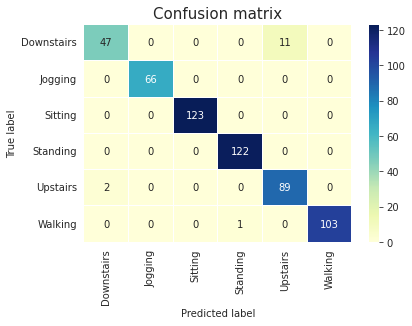

In [34]:
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
from pylab import savefig
predictions = model.predict(X_test)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
y_pred = predictions
np.argmax(y_test[0]),np.argmax(y_pred[0]),np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1)

(4, 4, array([4, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 4, 0, 5, 5, 3, 4, 3, 2, 2, 0,
        5, 4, 5, 1, 2, 4, 2, 4, 2, 3, 5, 0, 5, 3, 5, 4, 4, 1, 2, 0, 2, 5,
        3, 4, 2, 3, 3, 4, 0, 3, 1, 0, 5, 3, 3, 5, 5, 2, 4, 1, 3, 5, 3, 2,
        5, 0, 5, 3, 5, 0, 0, 2, 2, 2, 3, 5, 4, 2, 1, 0, 2, 0, 5, 4, 2, 1,
        2, 1, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 2, 2, 0, 2, 4, 5, 3, 5, 0, 5,
        0, 3, 2, 3, 5, 3, 4, 0, 3, 0, 5, 3, 5, 3, 2, 3, 4, 5, 2, 1, 4, 2,
        5, 3, 3, 3, 3, 3, 1, 4, 1, 0, 2, 1, 0, 1, 3, 3, 4, 2, 3, 3, 1, 1,
        3, 4, 3, 3, 3, 2, 0, 2, 5, 2, 2, 1, 3, 2, 2, 2, 3, 5, 0, 1, 2, 0,
        3, 1, 3, 4, 2, 4, 5, 1, 2, 5, 0, 2, 0, 5, 4, 4, 0, 4, 3, 5, 3, 4,
        2, 5, 3, 5, 3, 5, 2, 3, 3, 5, 2, 5, 5, 0, 2, 2, 4, 3, 4, 0, 4, 0,
        2, 4, 5, 2, 3, 2, 1, 3, 5, 3, 3, 5, 2, 2, 0, 0, 1, 4, 5, 1, 1, 1,
        4, 2, 3, 4, 5, 2, 0, 1, 2, 2, 5, 1, 2, 4, 5, 3, 5, 3, 1, 5, 2, 2,
        4, 2, 2, 1, 4, 0, 5, 0, 1, 3, 5, 1, 4, 4, 4, 5, 0, 0, 1, 5, 3, 5,
        2, 3, 1, 1, 0, 0, 4, 3, 

In [36]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)))
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)))))

print('Micro Precision: {:.2f}'.format(precision_score((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))

Confusion Matrix

[[ 47   0   0   0  11   0]
 [  0  66   0   0   0   0]
 [  0   0 123   0   0   0]
 [  0   0   0 122   0   0]
 [  2   0   0   0  89   0]
 [  0   0   0   1   0 103]]

Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98



In [37]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report((np.argmax(y_test, axis=1)), (np.argmax(y_pred, axis=1)), target_names=['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']))


Classification Report

              precision    recall  f1-score   support

  Downstairs       0.96      0.81      0.88        58
     Jogging       1.00      1.00      1.00        66
     Sitting       1.00      1.00      1.00       123
    Standing       0.99      1.00      1.00       122
    Upstairs       0.89      0.98      0.93        91
     Walking       1.00      0.99      1.00       104

    accuracy                           0.98       564
   macro avg       0.97      0.96      0.97       564
weighted avg       0.98      0.98      0.97       564



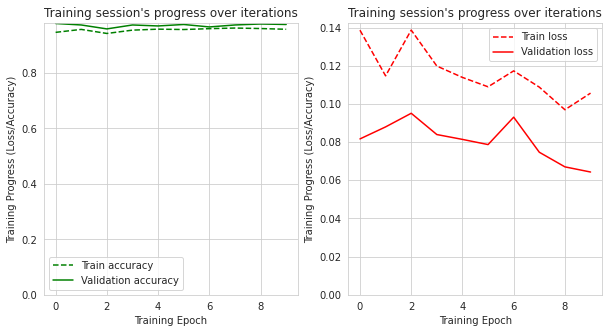

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.subplot(1,2,2)
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [39]:
 model.save_weights('model.h5')

# Convert to tf_lite

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
converter.inference_input_type, converter.inference_output_type

INFO:tensorflow:Assets written to: /tmp/tmpn162_0lo/assets


(tf.float32, tf.float32)

In [41]:
import pathlib


generated_dir = pathlib.Path("generated/")
generated_dir.mkdir(exist_ok=True, parents=True)
converted_model_file = generated_dir/"model.tflite"
converted_model_file.write_bytes(tflite_model)  

406408

#Test Our_dataset

In [ ]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
test_df = pd.read_csv('./dataset/our_dataset.txt', header = None, names = columns)
test_df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,42,Jogging,0,0.063,-1.039,-0.012;
1,42,Jogging,125000000,-0.022,-1.042,+0.018;
2,42,Jogging,250000000,-0.020,-0.987,+0.013;
3,42,Jogging,375000000,-0.018,-1.021,+0.028;
4,42,Jogging,500000000,0.008,-1.033,+0.004;
...,...,...,...,...,...,...
30741,37,Jogging,87750000000,0.563,-2.033,-0.048;
30742,37,Jogging,87875000000,-1.314,-0.593,-0.777;
30743,37,Jogging,88000000000,2.565,-2.143,-0.282;
30744,37,Jogging,88125000000,-0.716,-1.190,+0.227;


In [ ]:
# removing null values
test_df = test_df.dropna()
print(test_df.shape)
# transforming the z-axis to float
test_df['z-axis'] = test_df['z-axis'].str.replace(';', '')
test_df['z-axis'] = test_df['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
test_df = test_df[test_df['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
tdf = test_df.sort_values(by = ['user', 'timestamp'], ignore_index=True)
tdf

(30746, 6)


,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Jogging,125000000,-0.025,-1.016,0.090
1,37,Jogging,250000000,0.019,-1.017,0.102
2,37,Jogging,375000000,-0.017,-1.034,0.074
3,37,Jogging,500000000,-0.005,-1.036,0.095
4,37,Jogging,625000000,0.002,-1.020,0.125
...,...,...,...,...,...,...
30720,42,Jogging,186375000000,-0.012,-1.400,0.108
30721,42,Jogging,186500000000,-0.412,-0.849,0.158
30722,42,Jogging,186625000000,-0.050,-1.025,0.057
30723,42,Jogging,186750000000,-0.168,-1.020,0.115


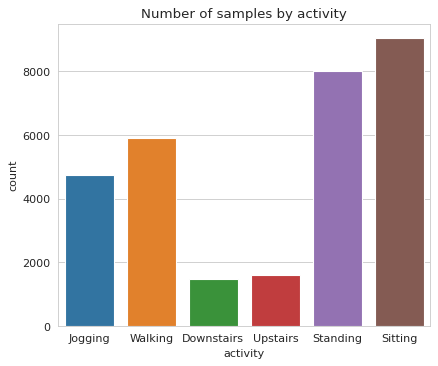

Sitting       9041
Standing      8010
Walking       5891
Jogging       4732
Upstairs      1592
Downstairs    1459
Name: activity, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = tdf)
plt.title('Number of samples by activity')
plt.show()
tdf['activity'].value_counts()

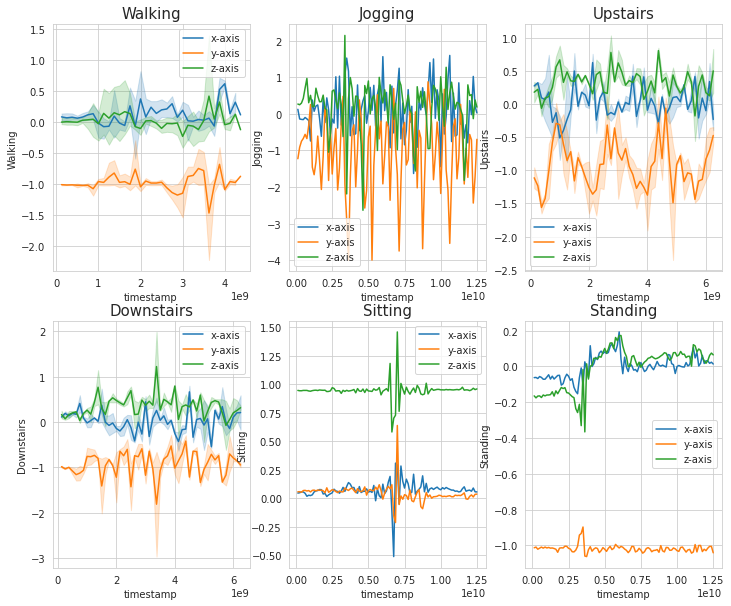

In [ ]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  datauser=tdf[(tdf['user']==41)&(tdf['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=datauser)
  sns.lineplot(y='y-axis',x='timestamp',data=datauser)
  sns.lineplot(y='z-axis',x='timestamp',data=datauser)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
  #plt.savefig(i+'.png')
  
  #plt.show()
plt.show()

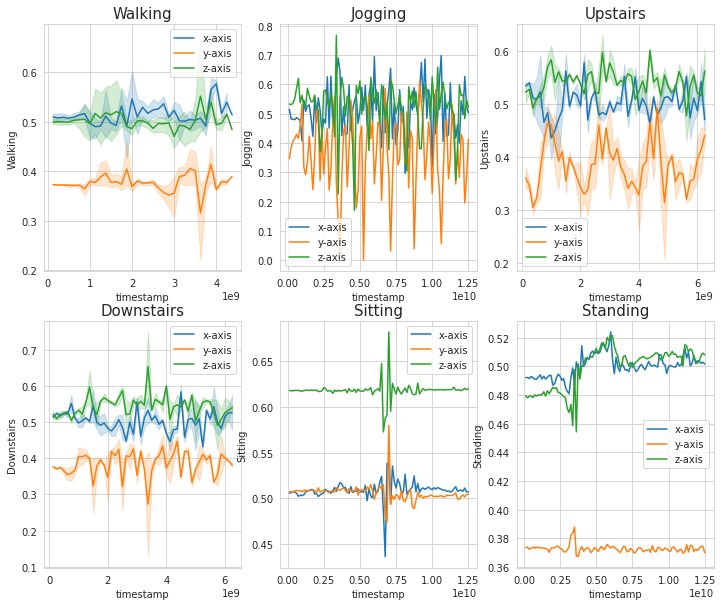

In [ ]:
# copy the data
tdf_max_scaled = tdf.copy()
# apply normalization techniques
for ind in tdf_max_scaled.columns:
  if ind == 'x-axis' or ind == 'y-axis' or ind == 'z-axis':
    tdf_max_scaled[ind] = (tdf_max_scaled[ind] + 4) /8
# indicate 
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  datauser=tdf_max_scaled[(tdf_max_scaled['user']==41)&(tdf_max_scaled['activity']==i)][:100]
  sns.lineplot(y='x-axis',x='timestamp',data=datauser)
  sns.lineplot(y='y-axis',x='timestamp',data=datauser)
  sns.lineplot(y='z-axis',x='timestamp',data=datauser)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
#plt.savefig(i+'.png')
  #plt.show()
plt.show()

In [ ]:
segments = []
labels = []
#數據會有些重疊
window_len = 50
check = []
from scipy import stats
import numpy as np
flag = False
for i in range(0,  tdf_max_scaled.shape[0]- window_len, 10):  
        
    if tdf_max_scaled['activity'][i] == tdf_max_scaled['activity'][i+window_len]:
        flag = True
        for j in range(0,window_len):

            xs = tdf_max_scaled['x-axis'].values[i+j]  

            ys = tdf_max_scaled['y-axis'].values[i+j]

            zs = tdf_max_scaled['z-axis'].values[i+j]

            segments.append([xs, ys, zs])
    else:
        flag = False
    if flag == True:
        label = stats.mode(tdf_max_scaled['activity'][i: i + window_len])[0][0]

        #segments.append([xs, ys, zs])
        check.append(label)
        labels.append(label)
print( np.asarray(segments, dtype= np.float32).shape)
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, window_len, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

(71000, 3)


In [ ]:
class_label =['Downstairs','Jogging',"Sitting","Standing",'Upstairs','Walking']
for act in class_label:
    for index,i in enumerate(check):
        if i == act:
          print (labels[index],check[index])
          break

[1. 0. 0. 0. 0. 0.] Downstairs
[0. 1. 0. 0. 0. 0.] Jogging
[0. 0. 1. 0. 0. 0.] Sitting
[0. 0. 0. 1. 0. 0.] Standing
[0. 0. 0. 0. 1. 0.] Upstairs
[0. 0. 0. 0. 0. 1.] Walking


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.99, random_state = 42)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14, 50, 3, 1), (1406, 50, 3, 1), (14, 6), (1406, 6))

In [ ]:
model.load_weights("/content/drive/MyDrive/emb/model.h5")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

2/2 [==============================] - 11s 65ms/step - loss: 7.8154 - accuracy: 0.2752
Test Accuracy : 0.2752489447593689
Test Loss : 7.815429210662842


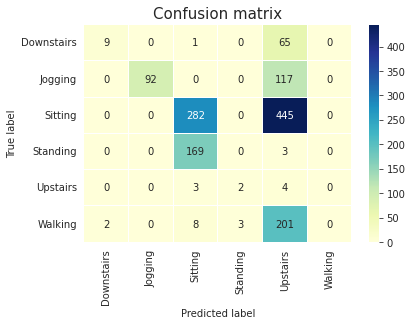

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
from pylab import savefig
predictions = model.predict(X_test)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()